In [18]:
#imported libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [20]:
plt.style.use('fivethirtyeight')

In [21]:
df = pd.read_csv("StudentsPerformance.csv")
df.shape

(1000, 8)

In [22]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There is no null values

In [24]:
#checking for duplicates
df[df.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


There is no duplicates

In [25]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploratory Data Analysis

In [26]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

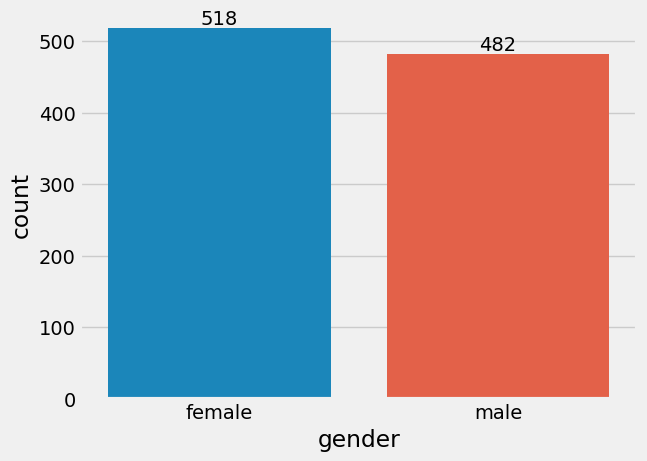

In [27]:
ax = sns.countplot(x="gender", data= df)

for bars in ax.containers:
    ax.bar_label(bars)

It is clear that the data contains slightly higher female students than male students lets get into EDA

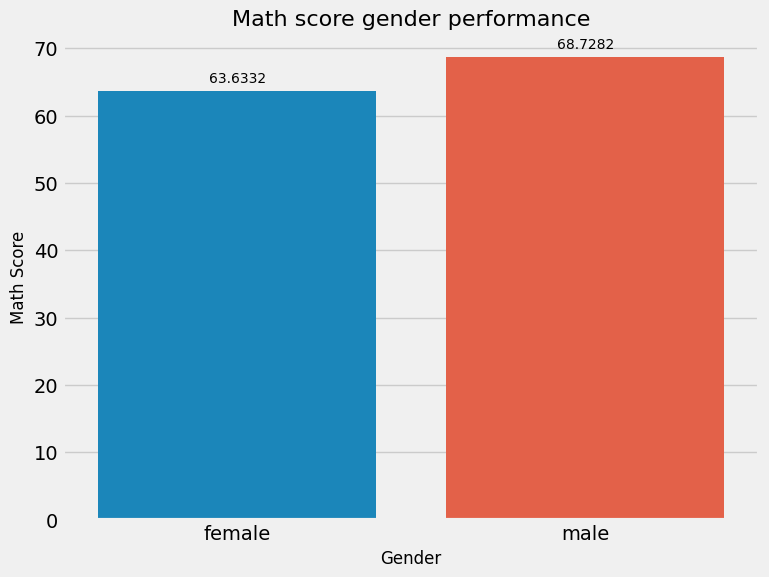

In [28]:
# Comparing the performance in math score of students based on the gender

gender_performance = df.groupby("gender")[["math score"]].mean()

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar chart
bar_plot = sns.barplot(x=gender_performance.index, y="math score", data=gender_performance)

# Add labels to the bars
for container in bar_plot.containers:
    ax.bar_label(container, fontsize=10, padding=4)

# Customize the plot
ax.set_title("Math score gender performance", fontsize=16)
ax.set_xlabel("Gender", fontsize=12)
ax.set_ylabel("Math Score", fontsize=12)
ax.set_xticklabels(gender_performance.index, rotation=0)
ax.yaxis.grid(True)
plt.show()


From the above analysis it is clear that male students do better in maths

Text(0.5, 1.0, 'Writing Score by gender')

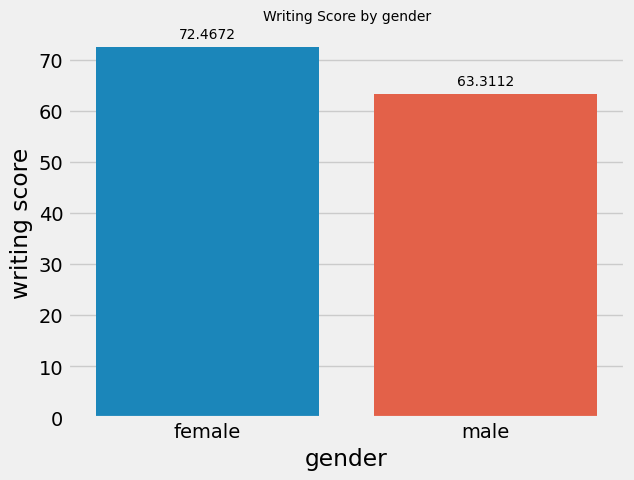

In [29]:
# Comparing the performance of writing score
writing_performance = df.groupby("gender")[["writing score"]].mean()

#Plotting the bar chart
ax = sns.barplot(x = writing_performance.index, y="writing score", data = writing_performance)

for bars in ax.containers:
    ax.bar_label(bars, padding = 4, fontsize = 10)

plt.title("Writing Score by gender",fontsize=10)

Female Students performed well in writing score 

Text(0.5, 1.0, ' reading Performance')

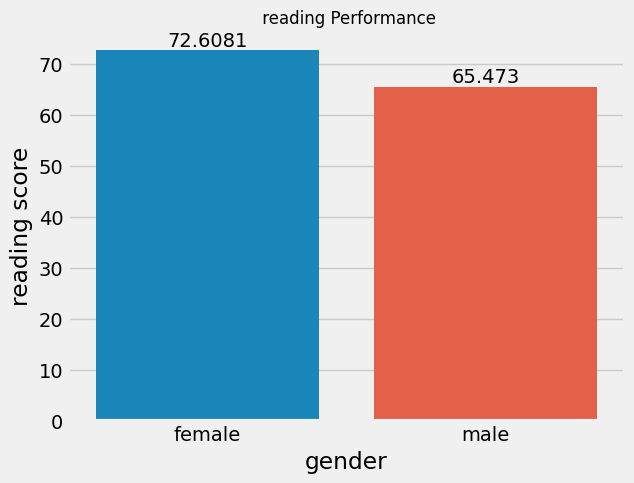

In [30]:
# Comparing readinging score based on gender

readinging_performance = df.groupby(["gender"],as_index = False)[["reading score"]].mean()

ax = sns.barplot(x = "gender", y="reading score", data = readinging_performance)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title(" reading Performance", fontsize = 12)

Female Students performing well in readinging

In [31]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Analysis of Students Performance in Mathematics

In [32]:
# Maths Performance based on race/ethnicity
race_performance = df.groupby(["race/ethnicity"], as_index = False)[["math score"]].mean()

race_performance.head()

,race/ethnicity,math score
0,group A,61.629213
1,group B,63.452632
2,group C,64.463950
3,group D,67.362595
4,group E,73.821429


Text(0.5, 1.0, 'Distribution of Math Marks')

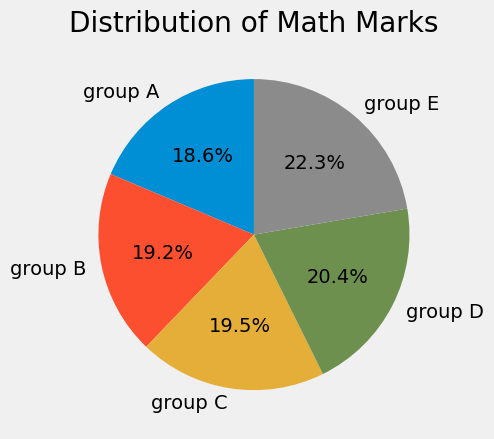

In [33]:
plt.pie(race_performance["math score"],labels= race_performance["race/ethnicity"],autopct='%1.1f%%',startangle=90 )
plt.title("Distribution of Math Marks")

Every group has a Equal Performance Group E performed well compared to others

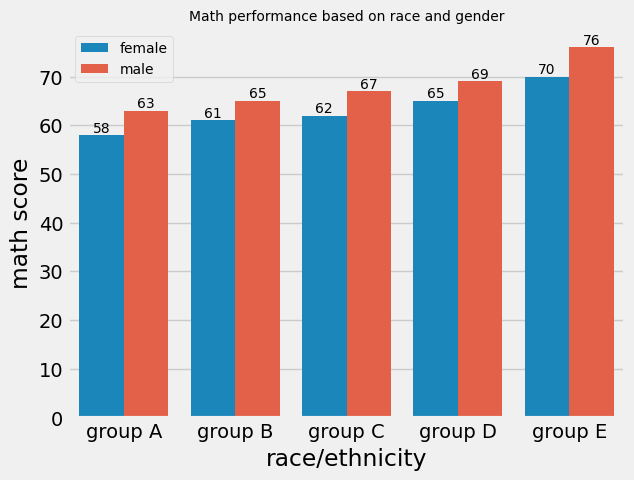

In [34]:
# Maths Performance based on race/ethnicity with gender

race_gender_performance = df.groupby(["race/ethnicity","gender"], as_index = False)["math score"].mean()

race_gender_performance["math score"] = race_gender_performance["math score"].astype(int)

ax = sns.barplot(x="race/ethnicity", y="math score", data = race_gender_performance, hue= "gender")

for bars in ax.containers:
    ax.bar_label(bars, fontsize = 10)
plt.title("Math performance based on race and gender", fontsize=10)
plt.legend(fontsize=10)

## Observation of student Performance in math based on their group

- **Male Student Performance across all groups**
  - Male students generally performed well in their respective groups
- **Group E female vs other Group male Performance**
  - Notably, Female students from Group E outperformed other male students from other groups
- **Overall Performance**
  - Overall, male students from group E exhibited the strong performance.


In [35]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

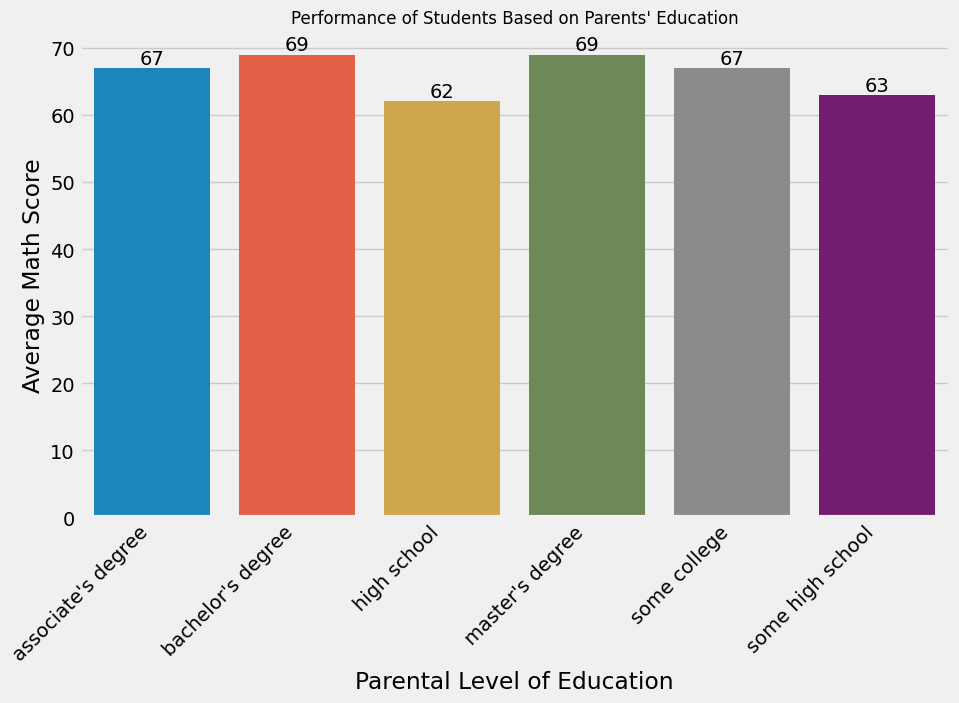

In [36]:
# Math Performance based on parental level of education

parental_level = df.groupby(["parental level of education"], as_index = False)["math score"].mean()

parental_level["math score"] = parental_level["math score"].astype(int)

plt.figure(figsize=(10, 6))  # Adjusting the figure size
plt.title("Performance of Students Based on Parents' Education", fontsize=12)
ax = sns.barplot(x="parental level of education", y="math score", data=parental_level)
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate and align x-axis labels
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Math Score")
plt.show()


In the analysis above, students whose parents have either a bachelor's degree or a master's degree perform well.

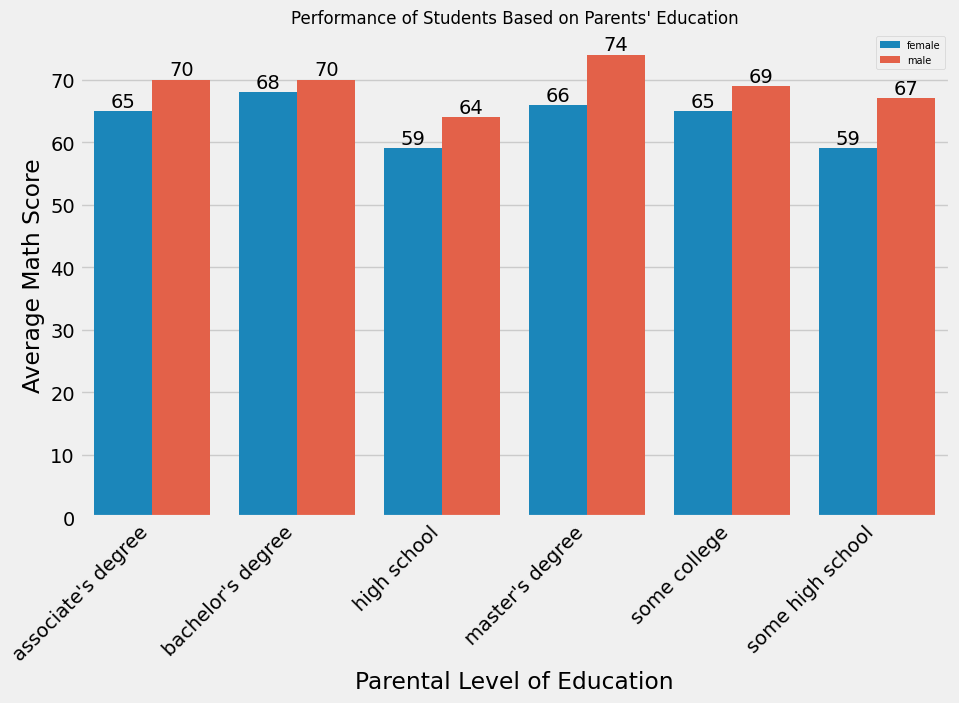

In [37]:
# Math Performance based on parental level of education

parental_level = df.groupby(["parental level of education","gender"], as_index = False)["math score"].mean()

parental_level["math score"] = parental_level["math score"].astype(int)

plt.figure(figsize=(10, 6))  # Adjusting the figure size
plt.title("Performance of Students Based on Parents' Education", fontsize=12)
ax = sns.barplot(x="parental level of education", y="math score",hue="gender", data=parental_level)
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate and align x-axis labels
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Math Score")
plt.legend(fontsize = 7)
plt.show()


It is clear that male students whose parents have a master's degree performed well.

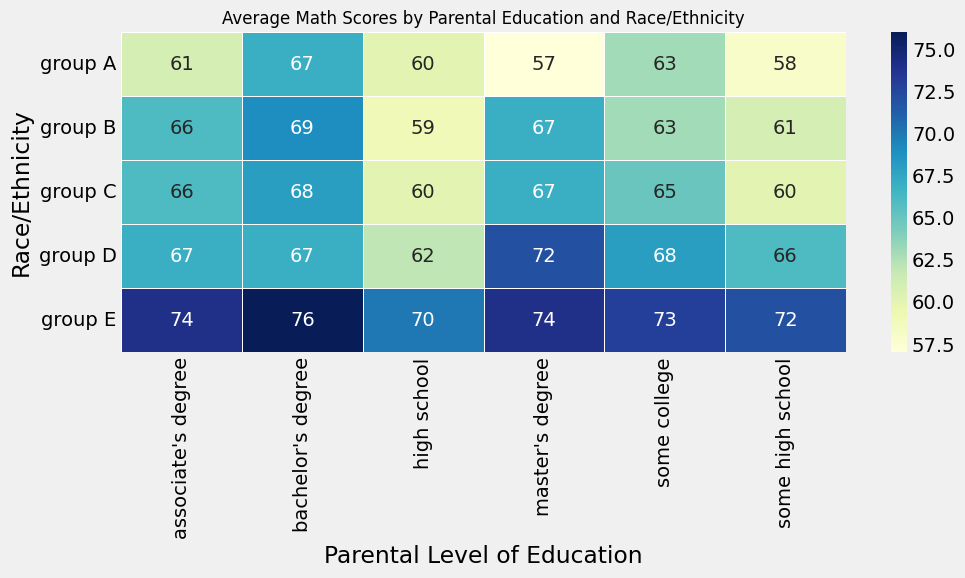

In [38]:
# Math Performance based on parental level of education and by group

# Calculate the mean math scores and convert to int
parental_level = df.groupby(["parental level of education", "race/ethnicity"], as_index=False)["math score"].mean()
parental_level["math score"] = parental_level["math score"].astype(int)

# Pivot the data for a heatmap
pivot_table = parental_level.pivot(index="race/ethnicity", columns="parental level of education", values="math score")

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.title("Average Math Scores by Parental Education and Race/Ethnicity", fontsize=12)
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.xlabel("Parental Level of Education")
plt.ylabel("Race/Ethnicity")
plt.tight_layout()
plt.yticks(rotation=0)
plt.show()







From the above analysis, we can draw the following conclusions:

- Students from Group E exhibited strong performance in the subject of math.
- Upon comparison with the previous analysis, it's notable that Group E students, whose parents' education level is high school, demonstrated math performance that is similar to or in line with other groups.


Text(0.5, 1.0, 'Students Performance based on their food')

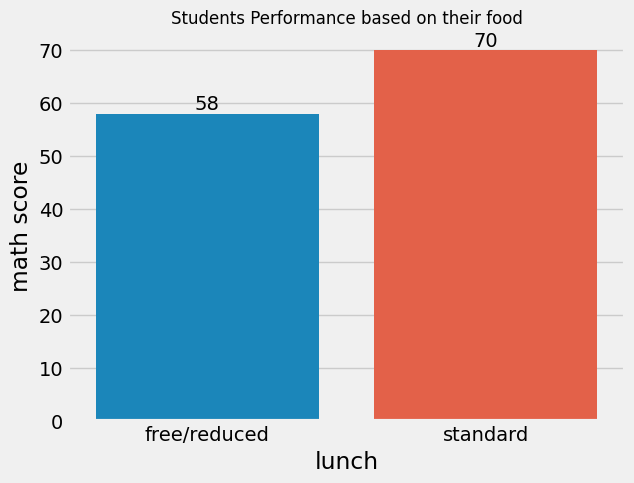

In [39]:
# Math Performance based on lunch
lunch_performance = df.groupby(["lunch"], as_index = False)["math score"].mean()

lunch_performance["math score"] = lunch_performance["math score"].astype(int)

ax = sns.barplot(x="lunch",y="math score", data = lunch_performance )

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Students Performance based on their food", fontsize = 12)

It's evident that students cannot perform well when their food does not meet the required standards.


Text(0.5, 1.0, 'Performance of students based on course')

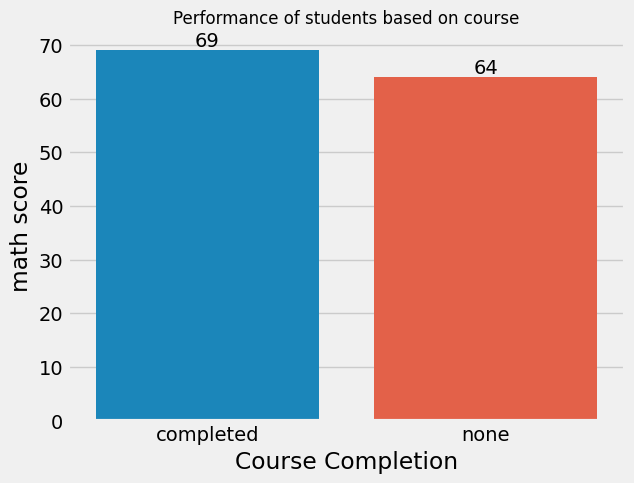

In [40]:
# analysing the performance of students in maths when they take test preparation course

course_performance = df.groupby(["test preparation course"], as_index= False)["math score"].mean()
course_performance["math score"] = course_performance["math score"].astype(int)
ax = sns.barplot(x="test preparation course", y="math score",data = course_performance)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("Course Completion")
plt.title("Performance of students based on course",fontsize = 12)

Overall, students who completed the test preparation course demonstrated slightly better performance.


Text(0.5, 1.0, 'Performance of students based on course')

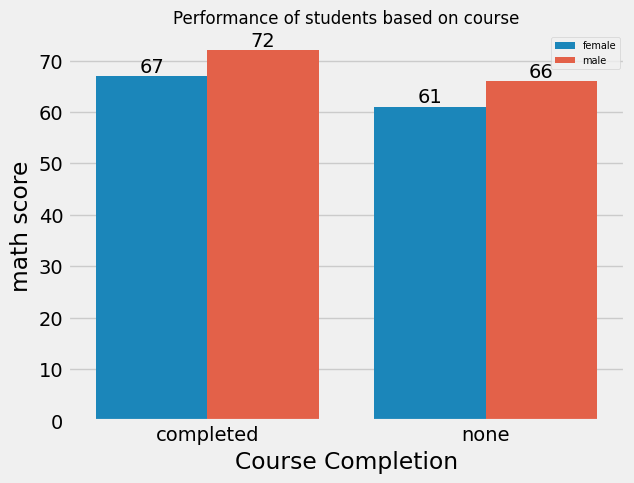

In [41]:
# analysing the performance of students in maths when they take test preparation course

course_performance = df.groupby(["test preparation course","gender"], as_index= False)["math score"].mean()
course_performance["math score"] = course_performance["math score"].astype(int)
ax = sns.barplot(x="test preparation course", y="math score",hue = "gender" ,data = course_performance)
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(fontsize = 7)
plt.xlabel("Course Completion")
plt.title("Performance of students based on course",fontsize = 12)

It appears that male students who completed the test preparation course performed well.


Text(0.5, 1.0, 'Performance of students based on course')

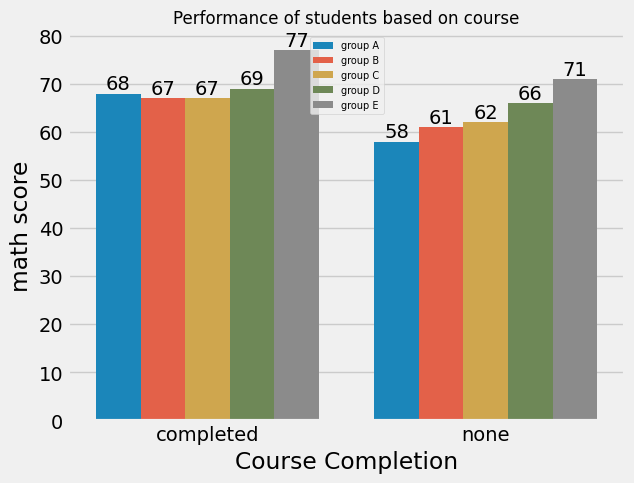

In [42]:
# Group perfomance based on test  preperation course
course_performance = df.groupby(["test preparation course","race/ethnicity"], as_index= False)["math score"].mean()
course_performance["math score"] = course_performance["math score"].astype(int)
ax = sns.barplot(x="test preparation course", y="math score",hue = "race/ethnicity" ,data = course_performance)
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(fontsize = 7)
plt.xlabel("Course Completion")
plt.title("Performance of students based on course",fontsize = 12)

From the above analysis:
- Group E students who completed the test preparation course outperformed other groups.
- Among students from Group A, those who did not complete the test preparation course exhibited the lowest performance.


**Conclusion for Math Score Analysis**

- Students whose parents have attained at least a bachelor's degree and who have access to a good standard of food tend to perform well in mathematics.
- Males, as well as females from Group E, exhibited strong performance in mathematics.
- Overall, students from Group E demonstrated commendable performance in mathematics.


In [43]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## Analysis of Students Performance in Reading


In [44]:
# reading Performance based on race/ethnicity
race_performance = df.groupby(["race/ethnicity"], as_index = False)[["reading score"]].mean()

race_performance.head()

,race/ethnicity,reading score
0,group A,64.674157
1,group B,67.352632
2,group C,69.103448
3,group D,70.030534
4,group E,73.028571


Text(0.5, 1.0, 'Distribution of Race Marks')

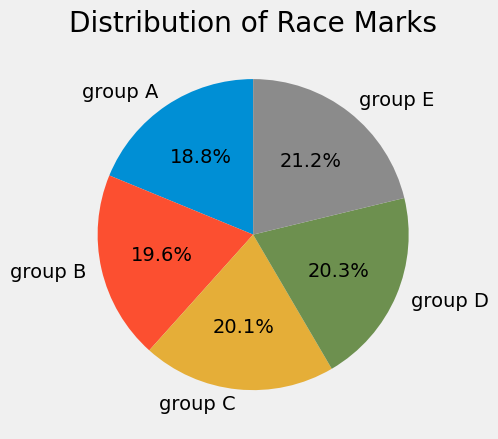

In [45]:
plt.pie(race_performance["reading score"],labels= race_performance["race/ethnicity"],autopct='%1.1f%%',startangle=90 )
plt.title("Distribution of Race Marks")

From the above chart, it is evident that Group C, Group D, and Group E performed well. Notably, Group E's performance surpassed that of both Group C and Group D.


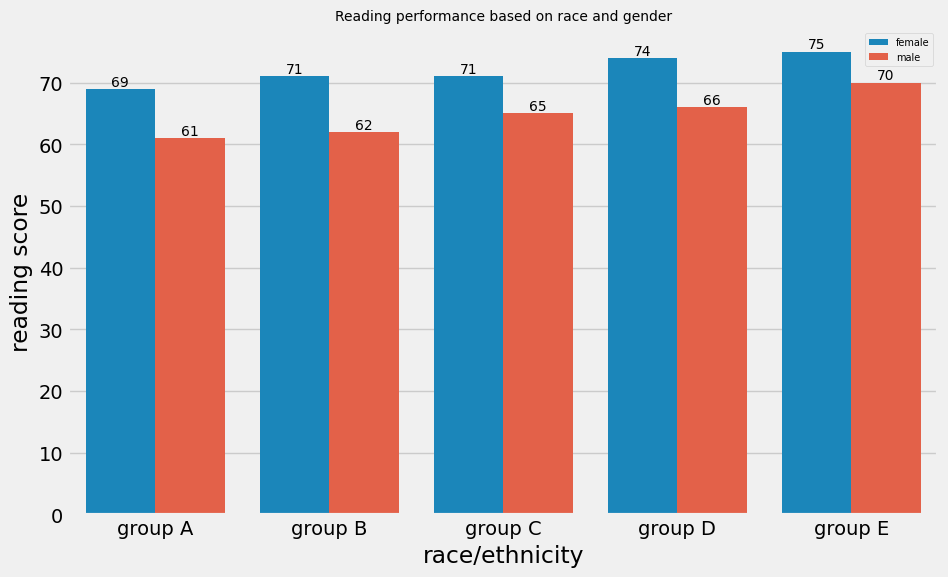

In [46]:
# Reading Performance based on race/ethnicity with gender

race_gender_performance = df.groupby(["race/ethnicity","gender"], as_index = False)["reading score"].mean()

race_gender_performance["reading score"] = race_gender_performance["reading score"].astype(int)
plt.figure(figsize=(10, 6))

ax = sns.barplot(x="race/ethnicity", y="reading score", data = race_gender_performance, hue= "gender")


for bars in ax.containers:
    ax.bar_label(bars, fontsize = 10)
plt.title("Reading performance based on race and gender", fontsize=10)
plt.legend(fontsize=7)

From the above analysis, it is evident that females in all groups performed well in the Reading category, with female students in Group E being the highest performers.


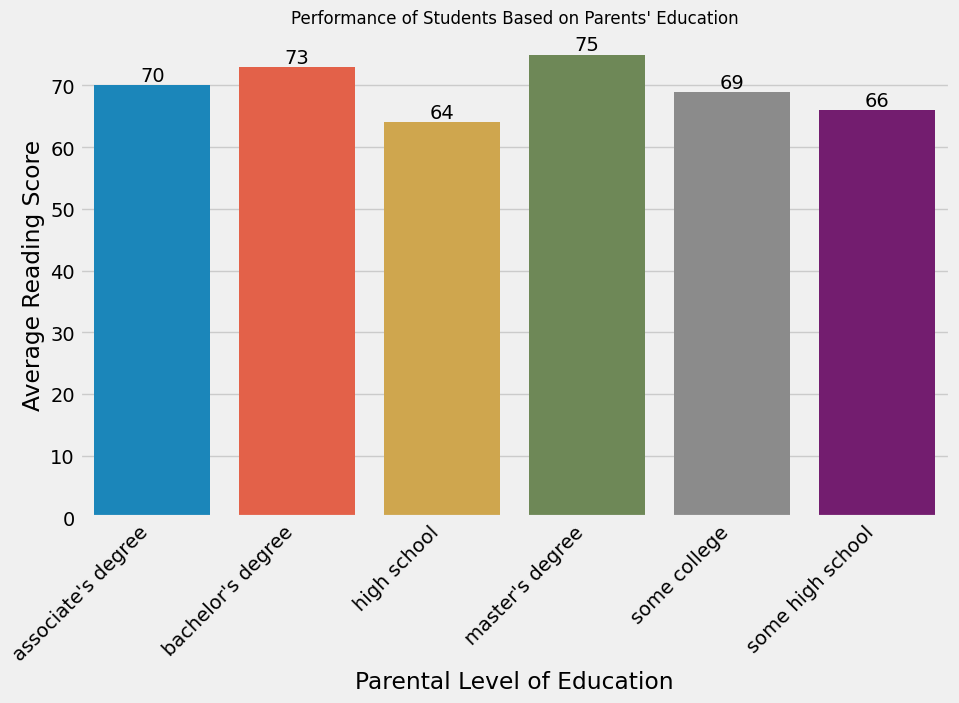

In [47]:
# Reading Performance based on parental level of education

parental_level = df.groupby(["parental level of education"], as_index = False)["reading score"].mean()

parental_level["reading score"] = parental_level["reading score"].astype(int)

plt.figure(figsize=(10, 6))  # Adjusting the figure size
plt.title("Performance of Students Based on Parents' Education", fontsize=12)
ax = sns.barplot(x="parental level of education", y="reading score", data=parental_level)
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate and align x-axis labels
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Reading Score")
plt.show()


It is evident that students whose parents have obtained master's or bachelor's degrees performed well. The highest-performing students are those whose parents hold master's degrees.


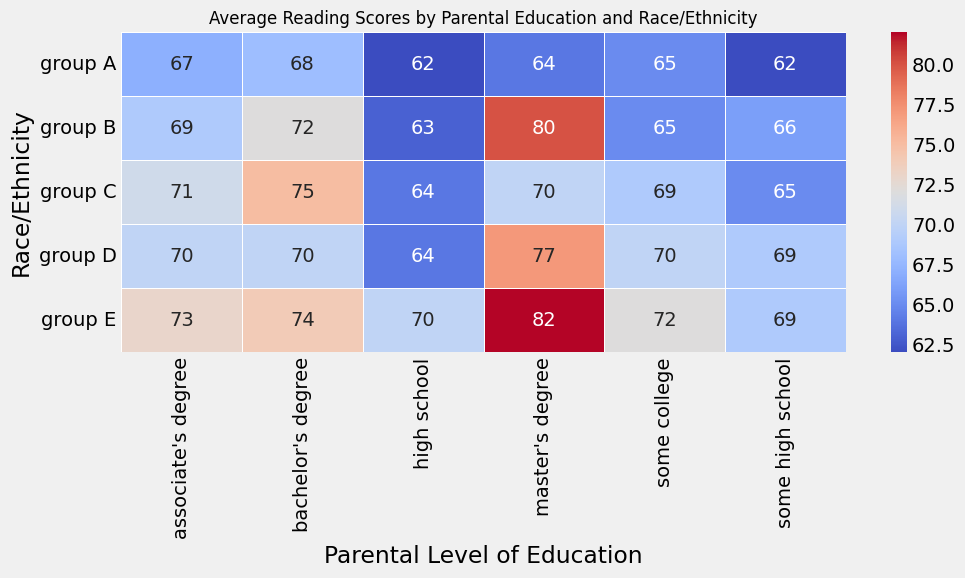

In [48]:
# Reading Performance based on parental level of education and by group

# Calculate the mean reading scores and convert to int
parental_level = df.groupby(["parental level of education", "race/ethnicity"], as_index=False)["reading score"].mean()
parental_level["reading score"] = parental_level["reading score"].astype(int)

# Pivot the data for a heatmap
pivot_table = parental_level.pivot(index="race/ethnicity", columns="parental level of education", values="reading score")

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.title("Average Reading Scores by Parental Education and Race/Ethnicity", fontsize=12)
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5)
plt.xlabel("Parental Level of Education")
plt.ylabel("Race/Ethnicity")
plt.tight_layout()
plt.yticks(rotation=0)
plt.show()

From the analysis, the following conclusions can be drawn:

- Students from Group E exhibited strong performance.
- Students whose parents hold a master's degree also demonstrated high performance.


Text(0.5, 1.0, 'Students Performance based on their food')

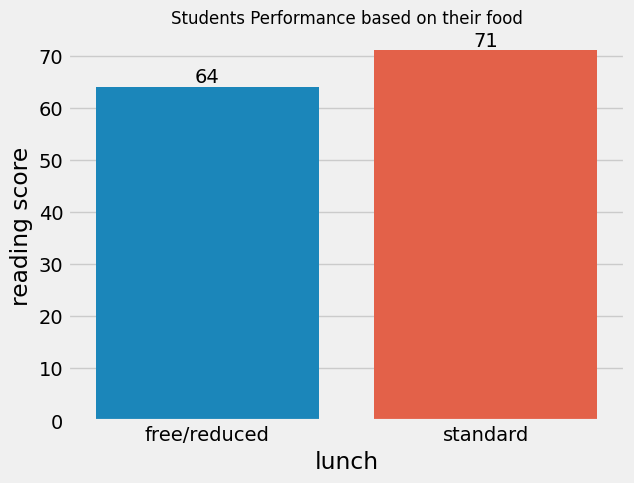

In [49]:
# Reading Performance based on lunch
lunch_performance = df.groupby(["lunch"], as_index = False)["reading score"].mean()

lunch_performance["reading score"] = lunch_performance["reading score"].astype(int)

ax = sns.barplot(x="lunch",y="reading score", data = lunch_performance )

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Students Performance based on their food", fontsize = 12)

Comparative analysis with mathematics reveals that student performance is not impacted as significantly as in mathematics. However, it is still evident that students who do not have access to standard food exhibited lower performance.


Text(0.5, 1.0, 'Performance of students based on course')

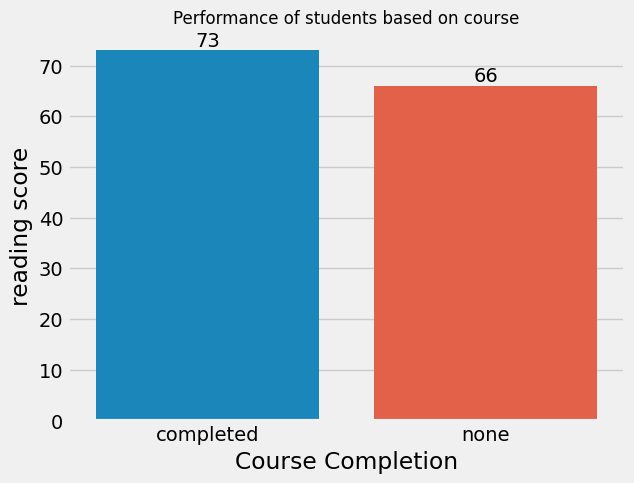

In [50]:
# analysing the performance of students in reading when they take test preparation course

course_performance = df.groupby(["test preparation course"], as_index= False)["reading score"].mean()
course_performance["reading score"] = course_performance["reading score"].astype(int)
ax = sns.barplot(x="test preparation course", y="reading score",data = course_performance)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("Course Completion")
plt.title("Performance of students based on course",fontsize = 12)

It's evident that students who complete the course achieve better performance.


Text(0.5, 1.0, 'Performance of students based on course')

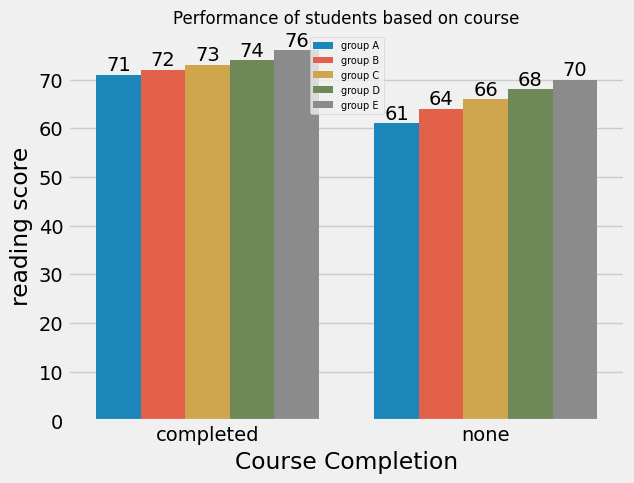

In [51]:
# Group perfomance based on test  preperation course
course_performance = df.groupby(["test preparation course","race/ethnicity"], as_index= False)["reading score"].mean()
course_performance["reading score"] = course_performance["reading score"].astype(int)
ax = sns.barplot(x="test preparation course", y="reading score",hue = "race/ethnicity" ,data = course_performance)
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(fontsize = 7)
plt.xlabel("Course Completion")
plt.title("Performance of students based on course",fontsize = 12)

From this analysis, it is evident that students who completed the test preparation course across all groups outperformed students who did not complete the course.


Conclusions for Reading Score Analysis:
- Students whose parents held at least a bachelor's degree performed well in reading.
- Female students outperformed male students in all groups in terms of reading scores.
- Students who completed the test preparation course achieved better performance in reading.


## Analysis of Students Performance in Writing


In [52]:
# writing Performance based on race/ethnicity
race_performance = df.groupby(["race/ethnicity"], as_index = False)[["writing score"]].mean()

race_performance.head()

,race/ethnicity,writing score
0,group A,62.674157
1,group B,65.600000
2,group C,67.827586
3,group D,70.145038
4,group E,71.407143


Text(0.5, 1.0, 'Distribution of Race Marks')

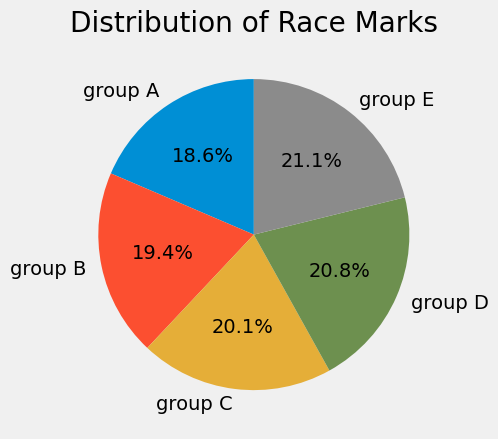

In [53]:
plt.pie(race_performance["writing score"],labels= race_performance["race/ethnicity"],autopct='%1.1f%%',startangle=90 )
plt.title("Distribution of Race Marks")

From the pie chart, it is evident that both Group D and Group E performed well.


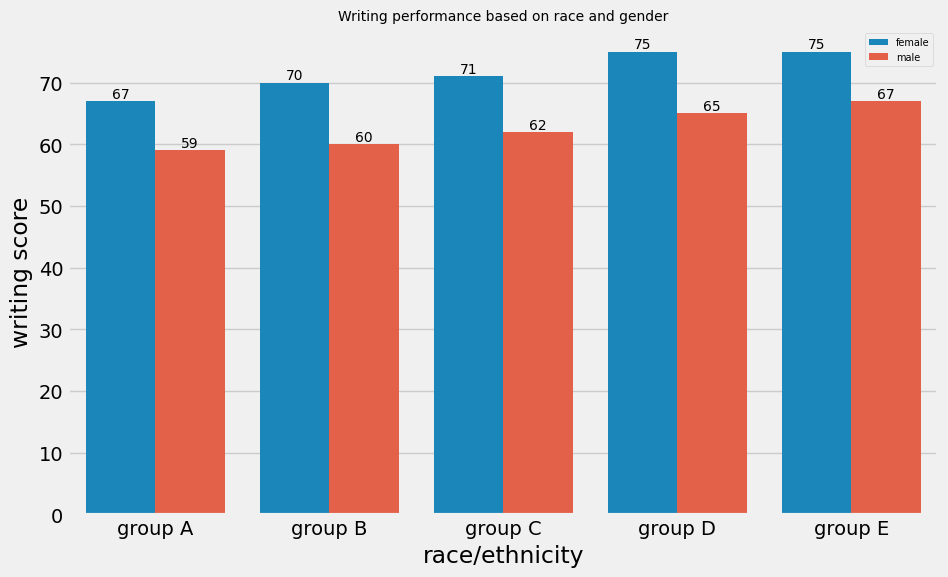

In [54]:
# Writing Performance based on race/ethnicity with gender

race_gender_performance = df.groupby(["race/ethnicity","gender"], as_index = False)["writing score"].mean()

race_gender_performance["writing score"] = race_gender_performance["writing score"].astype(int)
plt.figure(figsize=(10, 6))

ax = sns.barplot(x="race/ethnicity", y="writing score", data = race_gender_performance, hue= "gender")


for bars in ax.containers:
    ax.bar_label(bars, fontsize = 10)
plt.title("Writing performance based on race and gender", fontsize=10)
plt.legend(fontsize=7)

It is clear that female students outperformed every male student in their group.


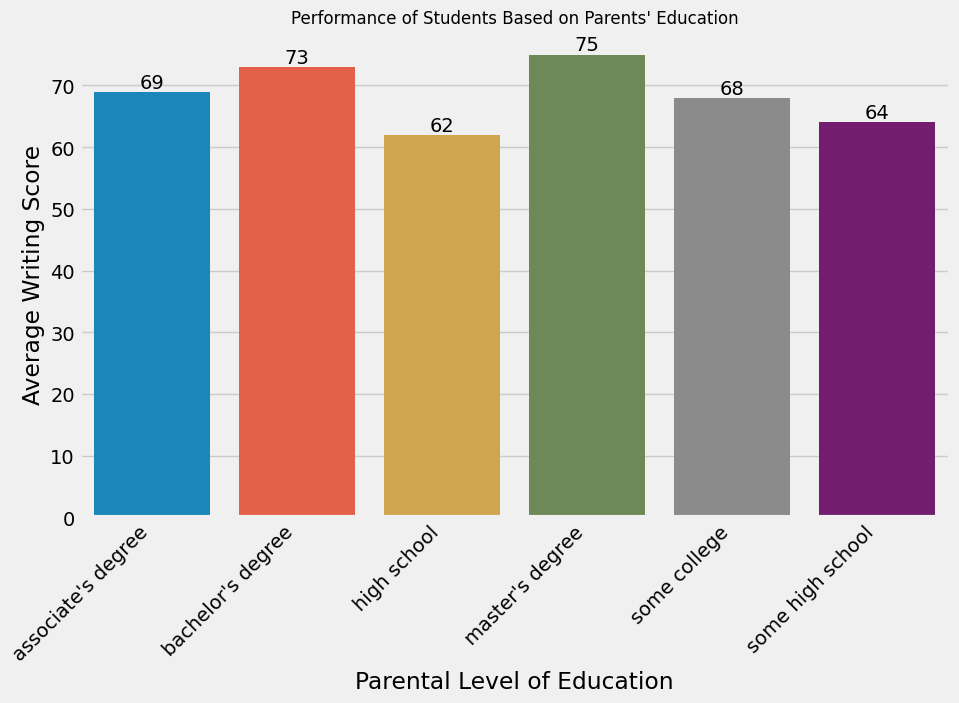

In [56]:
# Writing Performance based on parental level of education

parental_level = df.groupby(["parental level of education"], as_index = False)["writing score"].mean()

parental_level["writing score"] = parental_level["writing score"].astype(int)

plt.figure(figsize=(10, 6))  # Adjusting the figure size
plt.title("Performance of Students Based on Parents' Education", fontsize=12)
ax = sns.barplot(x="parental level of education", y="writing score", data=parental_level)
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotate and align x-axis labels
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Writing Score")
plt.show()


Students whose parents have a master's degree as their level of education performed well.


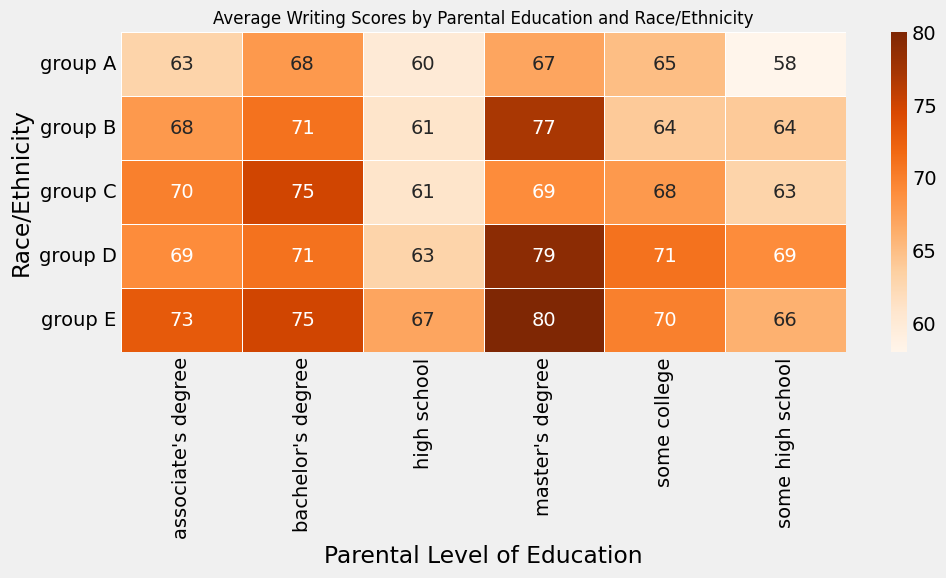

In [61]:
# Writing Performance based on parental level of education and by group

# Calculate the mean reading scores and convert to int
parental_level = df.groupby(["parental level of education", "race/ethnicity"], as_index=False)["writing score"].mean()
parental_level["writing score"] = parental_level["writing score"].astype(int)

# Pivot the data for a heatmap
pivot_table = parental_level.pivot(index="race/ethnicity", columns="parental level of education", values="writing score")

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.title("Average Writing Scores by Parental Education and Race/Ethnicity", fontsize=12)
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="Oranges", linewidths=0.5)
plt.xlabel("Parental Level of Education")
plt.ylabel("Race/Ethnicity")
plt.tight_layout()
plt.yticks(rotation=0)
plt.show()

From the above conclusion, it can be observed that students in Group E performed better compared to students in other groups. Moreover, students whose parents have a minimum of a bachelor's degree also demonstrated strong academic performance.


Text(0.5, 1.0, 'Students Performance based on their food')

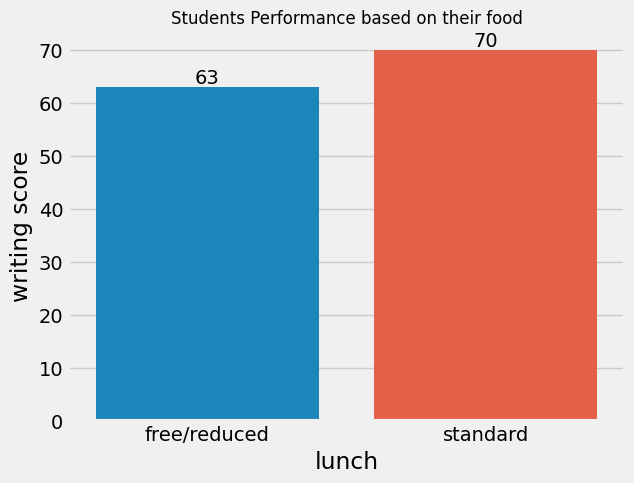

In [62]:
# Reading Performance based on lunch
lunch_performance = df.groupby(["lunch"], as_index = False)["writing score"].mean()

lunch_performance["writing score"] = lunch_performance["writing score"].astype(int)

ax = sns.barplot(x="lunch",y="writing score", data = lunch_performance )

for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Students Performance based on their food", fontsize = 12)

Student performance is not impacted as significantly as in mathematics. However, it is still evident that students who do not have access to standard food exhibited lower performance.

Text(0.5, 1.0, 'Performance of students based on course')

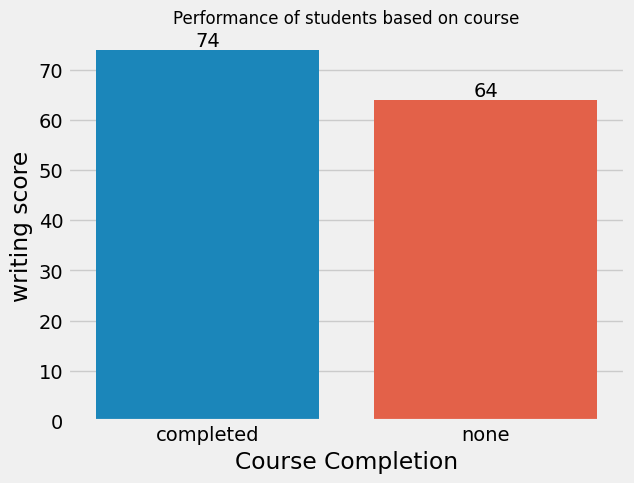

In [64]:
# analysing the performance of students in wriing when they take test preparation course

course_performance = df.groupby(["test preparation course"], as_index= False)["writing score"].mean()
course_performance["writing score"] = course_performance["writing score"].astype(int)
ax = sns.barplot(x="test preparation course", y="writing score",data = course_performance)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel("Course Completion")
plt.title("Performance of students based on course",fontsize = 12)

It is clearly seen that students who completed their test course preparation performed well.


Text(0.5, 1.0, 'Performance of students based on course')

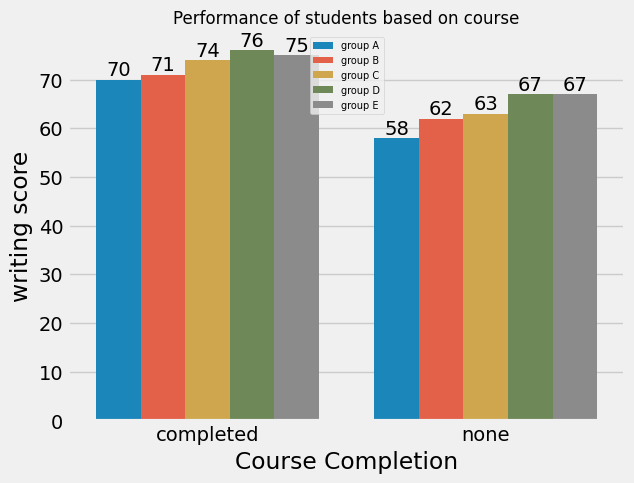

In [65]:
# Group perfomance based on test  preperation course
course_performance = df.groupby(["test preparation course","race/ethnicity"], as_index= False)["writing score"].mean()
course_performance["writing score"] = course_performance["writing score"].astype(int)
ax = sns.barplot(x="test preparation course", y="writing score",hue = "race/ethnicity" ,data = course_performance)
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(fontsize = 7)
plt.xlabel("Course Completion")
plt.title("Performance of students based on course",fontsize = 12)


From this analysis, it is evident that students who completed the test preparation course across all groups outperformed students who did not complete the course.

Conclusions for Writing Score Analysis:

1. Students whose parents held at least a bachelor's degree demonstrated strong performance in writing.
2. Female students consistently outperformed male students across all groups in terms of writing scores.
3. Students who completed the test preparation course exhibited improved performance in writing.


**Final Conclusion**

- Male students performed well in Mathematics.
- Female students excelled in Reading as well as Writing.
- Among the students, the level of education of their parents played a significant role in their performance. Students whose parents had at least a bachelor's degree performed better.
- Participation in the test preparation course led to improved performance in Reading as well as Writing.
- The type of lunch students receive had a significant impact on their Mathematics performance. Students who didn't have a standard meal exhibited lower performance.
